# DS-SF-42 | 03 | Exploratory Data Analysis | Codealong | Starter Code

In this code-along we will need the seaborn plotting package. Seaborn is built-around matplotlib to make some functionality much more user friendly.

To install a package, open terminal (or git-bash for Windows users).

Run:

```bash
conda install -y seaborn
```

Conda is a package manager, similar to `pip`.

In [2]:
!conda install -y seaborn

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /Users/ishashah/Applications/anaconda:

The following packages will be UPDATED:

    anaconda: 4.4.0-np112py36_0 --> custom-py36_0        
    conda:    4.3.21-py36_0     --> 4.3.30-py36h173c244_0
    seaborn:  0.7.1-py36_0      --> 0.8-py36_0           

anaconda-custo 100% |################################| Time: 0:00:00   1.61 MB/s
conda-4.3.30-p 100% |################################| Time: 0:00:00   1.09 MB/s
seaborn-0.8-py 100% |################################| Time: 0:00:00   1.03 MB/s


In [108]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A | Independent Review (20 minutes) | The _pandas_ Library

In [41]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Frank'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [24, 34, 44, 41, 52, 43],
    'marital_status': [0, 2, 1, 2, 0, 1]}).\
        set_index('name')

In [42]:
df

,age,gender,marital_status
name,,,
Alice,24,Female,0
Bob,34,Male,2
Carol,44,Female,1
Dave,41,Male,2
Eve,52,Female,0
Frank,43,Male,1


The following exerices that are marked with <font color="blue">(INDPENDENT)</font> are review of the Pandas material from Thursday. Take a stab at doing them on your own. Feel free to use the [inclass notebook](https://github.com/ga-students/DS-SF-42/blob/master/classes/02/notebooks/INCLASS-codealong-02-the-pandas-library-starter-code.ipynb) as a reference.

> ### <font color="blue">(INDPENDENT)</font> Question 1.  Subset the dataframe on the age and gender columns

In [43]:
# TODO
df[['age','gender']]

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


> ### <font color="blue">(INDPENDENT)</font> Question 2.  Subset the dataframe on the age column alone, first as a `DataFrame`, then as a `Series`

In [45]:
# TODO (DataFrame)
df[['age']]

,age
name,
Alice,24
Bob,34
Carol,44
Dave,41
Eve,52
Frank,43


In [46]:
# TODO (Series)
df['age']

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

In [47]:
type(df['age'])

pandas.core.series.Series

> ### <font color="blue">(INDPENDENT)</font> Question 3.  Subset the dataframe on the rows Bob and Carol

In [14]:
# TODO
df.loc[['Bob','Carol'],:]

,age,gender,marital_status
name,,,
Bob,34,Male,2
Carol,44,Female,1


> ### <font color="blue">(INDPENDENT)</font> Question 4.  Subset the dataframe on the row Eve alone, first as a `DataFrame`, then as a `Series`

In [17]:
# TODO (DataFrame)
df.loc[['Eve'],:]

,age,gender,marital_status
name,,,
Eve,52,Female,0


In [56]:
# TODO (Series)
df.loc['Eve']

age                   52
gender            Female
marital_status         0
Name: Eve, dtype: object

In [57]:
type(df.loc['Eve'])

pandas.core.series.Series

> ### <font color="blue">(INDPENDENT)</font> Question 5.  How old is Frank?

In [23]:
# TODO - Series
df.loc['Frank','age']

43

In [58]:
# A DataFrame
df.loc[['Frank'],['age']]

,age
name,
Frank,43


> ### <font color="blue">(INDPENDENT)</font> Question 6.  What is the men’s mean age, the women’s median age?

In [26]:
# TODO
df.loc[df['gender']=='Male',['age']].mean()

age    39.333333
dtype: float64

In [59]:
women_median_age = np.median(df.loc[df['gender'] == 'Female',['age']])
print('women\'s median age is',women_median_age)

women's median age is 44.0


## Part B

- `.mean()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)
- `.var()`, `.std()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html)

In [60]:
df = pd.read_csv('../datasets/dataset-04-zillow.csv', index_col = 'ID')

### `Series.mean()` - Compute the `Series` mean value

In [61]:
df.SalePrice.mean()

1.3974229429999998

> #### Activity: What's `Size`'s mean?

In [62]:
df.Size.mean()

1641.3009307135471

In [35]:
# TODO
df.head()

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.71,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.15,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.60,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.50,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.97,0.0,2.0,2.0,1299.0,NaN,1993.0


> #### Activity: What fraction of the properties sold in the dataset are studios?

In [65]:
df.IsAStudio.unique()

array([  0.,   1.,  nan])

In [66]:
df.IsAStudio.value_counts()

0.0    957
1.0     29
Name: IsAStudio, dtype: int64

In [68]:
len(df.loc[df['IsAStudio'] == 1])/len(df)

0.029

In [64]:
# TODO
df.IsAStudio.describe()

count    986.000000
mean       0.029412
std        0.169043
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: IsAStudio, dtype: float64

### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [69]:
# TODO
df.mean()

SalePrice         1.397423
IsAStudio         0.029412
Beds              2.572967
Baths             1.977548
Size           1641.300931
LotSize        3020.640288
BuiltInYear    1947.533333
dtype: float64

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [70]:
# TODO
df.var()

SalePrice      3.015131e+00
IsAStudio      2.857569e-02
Beds           1.564729e+00
Baths          1.277654e+00
Size           1.054762e+06
LotSize        8.142064e+06
BuiltInYear    1.445639e+03
dtype: float64

> #### Activity: What's the variance for the number of beds in the dataset?

In [71]:
# TODO
df['Beds'].var()

1.5647293928888621

In [72]:
df['Beds'].describe()

count    836.000000
mean       2.572967
std        1.250891
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: Beds, dtype: float64

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [73]:
# TODO
df.std()

SalePrice         1.736413
IsAStudio         0.169043
Beds              1.250891
Baths             1.130334
Size           1027.016175
LotSize        2853.430139
BuiltInYear      38.021563
dtype: float64

> #### Activity: What's the standard deviation for the number of beds in the dataset?

In [74]:
# TODO
df['Beds'].std()

1.2508914392899417

## Part C

- `.median()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)
- `.count()`, `.sum()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html)
- `.count()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
- `.min()`, `.max()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)
- `.quantile()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html)
- `.describe()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### `.median()` - Compute the median value

In [75]:
# TODO
df.median()

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2622.0
BuiltInYear    1939.0
dtype: float64

> #### Activity: What's the median sale price for properties in the dataset?

In [76]:
# TODO
df['SalePrice'].median()

1.1

In [77]:
np.median(df['SalePrice'])

1.1000000000000001

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [78]:
df.count()

Address        1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
Beds            836
Baths           942
Size            967
LotSize         556
BuiltInYear     975
dtype: int64

In [79]:
df.IsAStudio.count()

986

Which leaves 14 houses for which we don't know if they are studios or not.

In [82]:
df.IsAStudio.dropna().shape[0]

(986,)

In [83]:
df.IsAStudio.dropna().shape[0] + df.IsAStudio.isnull().sum()

1000

In [84]:
df.IsAStudio.sum()

29.0

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [85]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
DateOfSale                                        1/10/16
SalePrice                                           1e-06
IsAStudio                                               0
Beds                                                    1
Baths                                                   1
Size                                                  264
LotSize                                                44
BuiltInYear                                          1870
dtype: object

In [86]:
df.max()

Address        San Carlos St, Carmel, CA
DateOfSale                        2/9/16
SalePrice                           32.7
IsAStudio                              1
Beds                                   9
Baths                                 14
Size                               11500
LotSize                            47916
BuiltInYear                         2015
dtype: object

> #### <font color="blue">(INDPENDENT)</font> Activity: What are properties that were sold at the lowest price?  At what price?

In [87]:
# TODO
df['SalePrice'].min()

9.9999999999999995e-07

In [98]:
df.loc[df['SalePrice'] == df['SalePrice'].min(),:]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,0.000001,0.0,7.0,6.0,2904.0,2482.0,1900.0


> #### <font color="blue">(INDPENDENT)</font> Activity: What are properties that were sold at the highest price?  At what price?

In [89]:
# TODO
df['SalePrice'].max()

32.700000000000003

In [99]:
df.loc[df['SalePrice'] == df['SalePrice'].max(),:]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15083161,"1825 Scott St, San Francisco, CA",11/23/15,32.7,0.0,NaN,1.0,1100.0,1694.0,1900.0


### `.quantile()` - Compute values at the given quantile

In [100]:
df.quantile(.5)

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2622.0
BuiltInYear    1939.0
Name: 0.5, dtype: float64

By definition, the median is the 50% quantile.

In [101]:
df.median()

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2622.0
BuiltInYear    1939.0
dtype: float64

In [102]:
df.quantile(.25)

SalePrice         0.8
IsAStudio         0.0
Beds              2.0
Baths             1.0
Size           1027.5
LotSize        2375.0
BuiltInYear    1912.0
Name: 0.25, dtype: float64

In [103]:
df.quantile(.75)

SalePrice         1.5325
IsAStudio         0.0000
Beds              3.0000
Baths             2.0000
Size           1947.5000
LotSize        3049.0000
BuiltInYear    1986.0000
Name: 0.75, dtype: float64

### `.describe()` - Generate various summary statistics

In [104]:
df.describe()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
count,1000.000000,986.000000,836.000000,942.000000,967.000000,556.000000,975.000000
mean,1.397423,0.029412,2.572967,1.977548,1641.300931,3020.640288,1947.533333
std,1.736413,0.169043,1.250891,1.130334,1027.016175,2853.430139,38.021563
min,0.000001,0.000000,1.000000,1.000000,264.000000,44.000000,1870.000000
25%,0.800000,0.000000,2.000000,1.000000,1027.500000,2375.000000,1912.000000
50%,1.100000,0.000000,2.000000,2.000000,1350.000000,2622.000000,1939.000000
75%,1.532500,0.000000,3.000000,2.000000,1947.500000,3049.000000,1986.000000
max,32.700000,1.000000,9.000000,14.000000,11500.000000,47916.000000,2015.000000


In [105]:
df.SalePrice.describe()

count    1000.000000
mean        1.397423
std         1.736413
min         0.000001
25%         0.800000
50%         1.100000
75%         1.532500
max        32.700000
Name: SalePrice, dtype: float64

In [106]:
df.Address.describe()

count                                          1000
unique                                          993
top       829 Folsom St UNIT 906, San Francisco, CA
freq                                              2
Name: Address, dtype: object

## Part D

- Boxplots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)

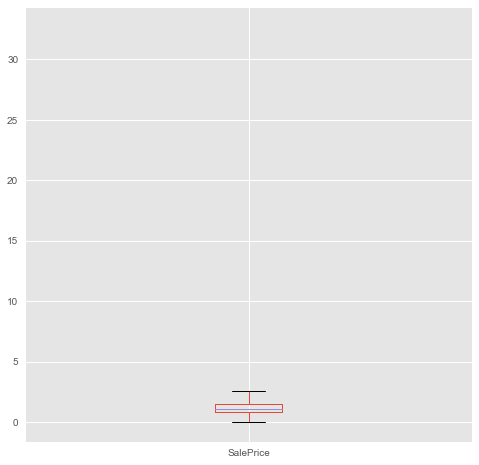

In [125]:
#Series
df.SalePrice.plot(kind = 'box', figsize = (8, 8))


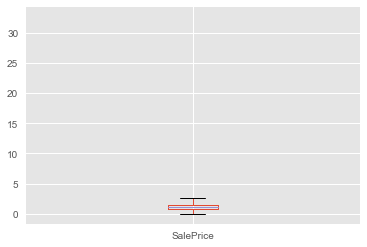

In [110]:
#DF
df[['SalePrice']].boxplot(figsize = (8, 8))

> In the same plot, plot the boxplots of `Beds` and `Baths`

In [ ]:
# TODO

## Part E

- Histograms
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html)

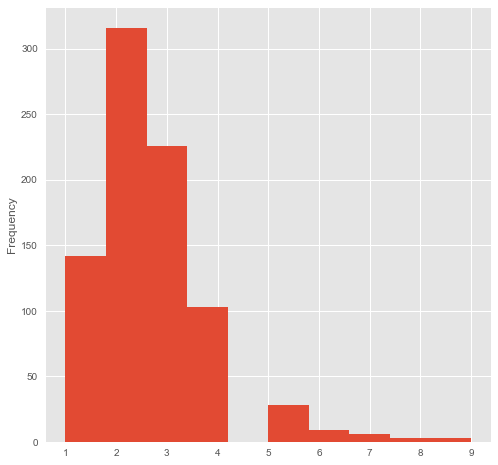

In [111]:
df.Beds.plot(kind = 'hist', figsize = (8, 8))

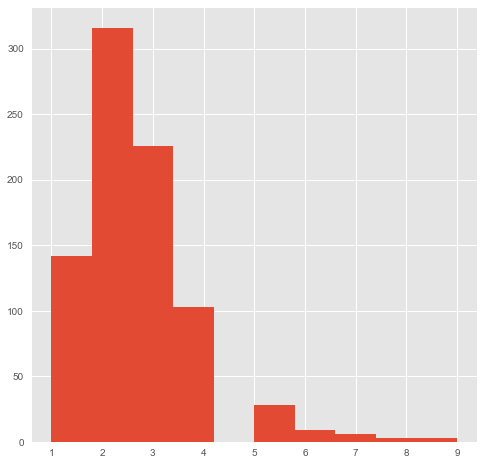

In [112]:
df.Beds.hist(figsize = (8, 8))

> #### Activity: In the same plot, plot the histograms of `Beds` and `Baths`

In [ ]:
# TODO

## Part F

- `.mode()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)

### `.mode()` - Compute the mode value(s)

In [113]:
df.mode()

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",11/20/15,1.1,0.0,2.0,1.0,1000.0,2495.0,1900.0
1,"150 Grand View Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1915 Diamond St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2299 Market St APT 502, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"643 Natoma St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
df.Address.mode()

0             1 Mono St # B, San Francisco, CA
1        150 Grand View Ave, San Francisco, CA
2           1915 Diamond St, San Francisco, CA
3      1954 Golden Gate Ave, San Francisco, CA
4    2299 Market St APT 502, San Francisco, CA
5             643 Natoma St, San Francisco, CA
6    829 Folsom St UNIT 906, San Francisco, CA
dtype: object

In [115]:
df.Baths.mode()

0    1.0
dtype: float64

The `.mode()` method gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

## Part G

- `.corr()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html)
- Heatmaps
  - (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.matshow)
- Scatter plots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
- Scatter matrices
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

In [116]:
df.corr()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [117]:
df.Beds.corr(df.Baths)

0.71519388432089781

### Heatmaps

In [118]:
corr = df.corr()

corr

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [ ]:
# TODO


Let's pretty this up using the seaborn package.

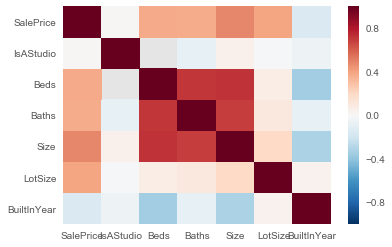

In [119]:
sns.heatmap(corr)

### Scatter plots

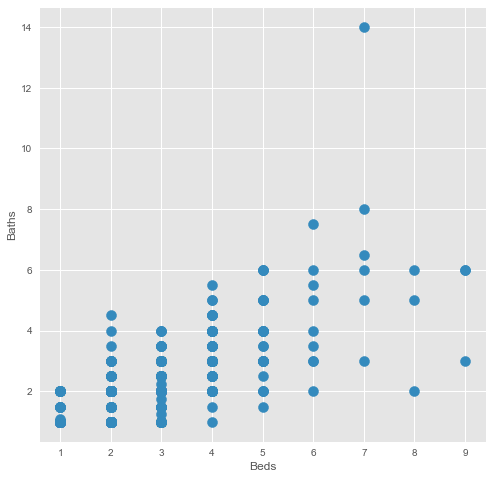

In [120]:
df.plot(kind = 'scatter', x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

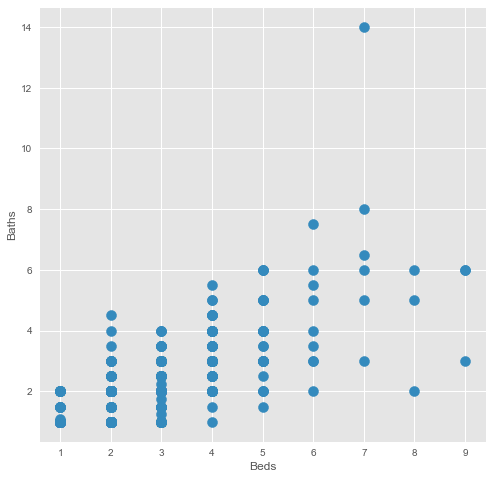

In [121]:
df.plot.scatter(x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

### Pair scatterplots with Seaborn

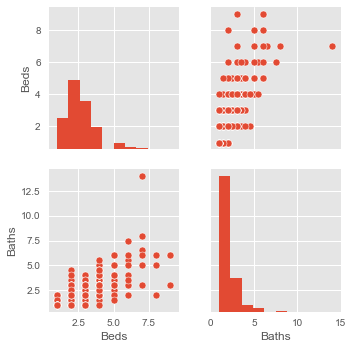

In [122]:
sns.pairplot(df[['Beds', 'Baths']].dropna())

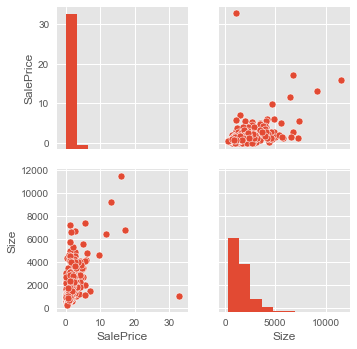

In [123]:
sns.pairplot(df[['SalePrice', 'Size']].dropna())

In [ ]:
sns.pairplot(df.dropna())

### <font color="blue">Check</font> - why are plots along the diagonal not scatters?

## Part H

- `.value_counts()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
- `.crosstab()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

> #### Activity: Reproduce the `Beds` histogram above.  For each possible number of beds, how many properties share that bed count?

In [ ]:
# TODO

> Careful on checking for `NaN` values!

In [ ]:
# TODO

> #### Activity: Create a frequency table for `Baths` over `Beds`

In [ ]:
# TODO

> #### Activity: Create a frequency table for `Beds` and `Baths` (together) over the century the houses were built

In [ ]:
# TODO